<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: دانیال راستی 

**Student ID**: 99101581



## **Briefing:**
 **In this section, we are going to investigate linear regression and its extensions ridge and lasso shrinkage methods in Boston dataset.**

In [24]:
## Import necessary libraries here ##

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV, LassoCV

**Part 1:**
First familiarize yourself with Boston dataset. Briefly explain its features and dataset's shape. You are provided with the required dataset named **boston.csv**.

In [16]:
## Write your code here ##
# each row of this data set represents a town in Boston. 
# the data set has 506 rows and 14 columns
# features are :
# crim: per capita crime rate by town
# zn: proportion of residential land zoned for lots over 25,000 sq. ft.
# indus: proportion of non-retail business acres per town
# chas: Charles River dummy variable (1 if the tract bounds the river, 0 otherwise)
# nox: nitrogen oxides concentration (parts per million)
# rm: average number of rooms per dwelling
# age: proportion of owner-occupied units built prior to 1940
# dis: weighted mean of distances to five Boston employment centres
# rad: index of accessibility to radial highways
# tax: property tax rate per $10,000 of valuation
# ptratio: pupil-teacher ratio by town
# lstat: percentage of lower status of the population
# medv: median value of owner-occupied homes in $1000s

# the last one (medv) is considered as dependent variabe.


**Part 2:**
Split dataset into train and test sets. Train linear regression model using all of the features. Report $R^2$ and RMSE error metrics for both train and test sets. Also report all of the coefficients.

In [17]:
# Load the Boston dataset from the CSV file
boston_data = pd.read_csv("Q1/Boston.csv")

# Separate features (X) and target variable (y)
X = boston_data.drop(columns=['MEDV'])
y = boston_data['MEDV']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model using all features
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate R^2 scores
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Get coefficients
coefficients = pd.DataFrame({'feature': X.columns, 'coefficient': model.coef_})

# Print results
print("Training set:")
print("R^2 score: {:.3f}".format(r2_train))
print("RMSE: {:.3f}".format(rmse_train))

print("\nTest set:")
print("R^2 score: {:.3f}".format(r2_test))
print("RMSE: {:.3f}".format(rmse_test))

print("\nCoefficients:")
print(coefficients)

Training set:
R^2 score: 0.751
RMSE: 4.652

Test set:
R^2 score: 0.669
RMSE: 4.929

Coefficients:
    feature  coefficient
0      CRIM    -0.113056
1        ZN     0.030110
2     INDUS     0.040381
3      CHAS     2.784438
4        NX   -17.202633
5        RM     4.438835
6       AGE    -0.006296
7       DIS    -1.447865
8       RAD     0.262430
9       TAX    -0.010647
10  PTRATIO    -0.915456
11        B     0.012351
12    LSTAT    -0.508571


**Part 3:**
Now, we want to see the effect of ridge regression on learning process. To do so, set the alphas parameter as follows for synchronization:$$ alphas = 10**np.linspace (3,-3,100) *0.5$$

In [18]:
## Write your code here ##

# Set alphas parameter for ridge regression
alphas = 10**np.linspace(3, -3, 100) * 0.5


 Now, plot the following in separate plots:

1- MSE for train and test versus α

2- Coefficients versus α

3- Number of not-considered features versus α

Finally select the optimal value of α. Report MSE, $R^2$ and coefficients.Compare this case with the linear regression case.

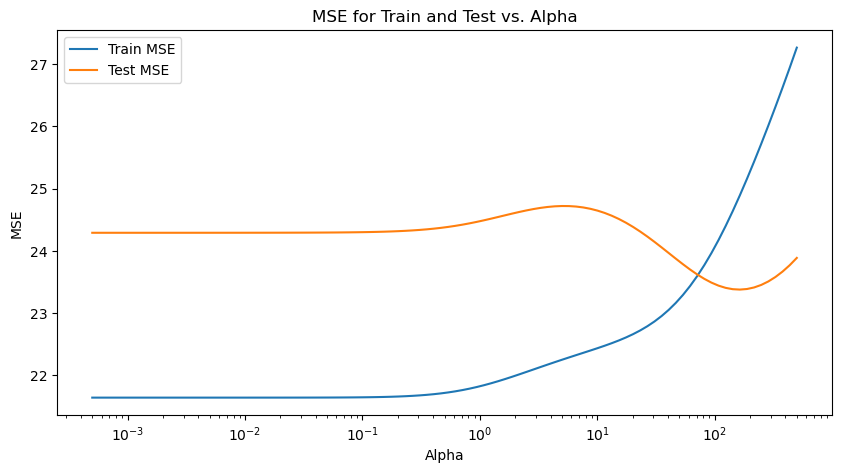

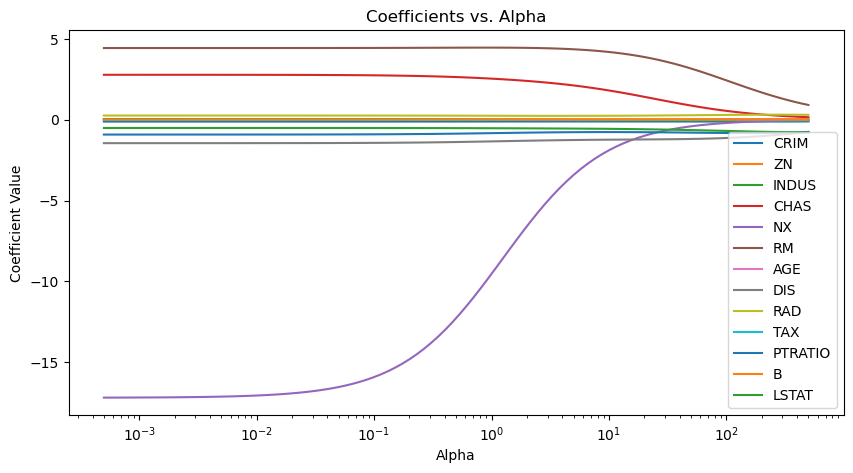

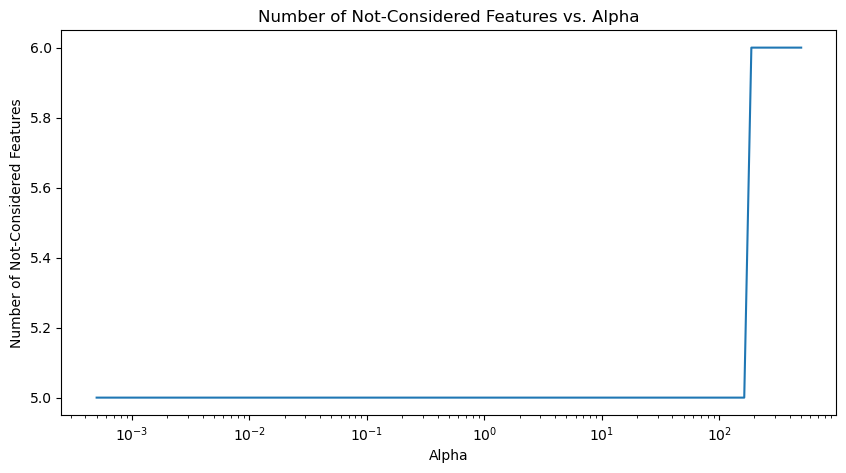

Optimal Alpha: 163.72745814388642
Optimal Model MSE: 23.378168171507387
Optimal Model R^2: 0.6812087531281752

Optimal Model Coefficients:
CRIM: -0.111
ZN: 0.04
INDUS: -0.052
CHAS: 0.381
NX: -0.115
RM: 1.897
AGE: 0.007
DIS: -1.052
RAD: 0.309
TAX: -0.015
PTRATIO: -0.823
B: 0.012
LSTAT: -0.726


In [19]:
## Write your code here ##

# Initialize lists to store results
mse_train = []
mse_test = []
coefficients = []
num_not_considered_features = []
threshold = 0.1 # if weight is under this value, it is counted as zero

# Train ridge regression models for each alpha
for alpha in alphas:
    # Initialize and train ridge regression model
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    
    # Predict on training and testing sets
    y_train_pred = ridge_model.predict(X_train)
    y_test_pred = ridge_model.predict(X_test)
    
    # Calculate MSE for training and testing sets
    mse_train.append(mean_squared_error(y_train, y_train_pred))
    mse_test.append(mean_squared_error(y_test, y_test_pred))
    
    # Store coefficients
    coefficients.append(ridge_model.coef_)
    
    # Calculate number of not-considered features (features with coefficients equal to zero)
    num_not_considered_features.append(np.sum(np.abs(ridge_model.coef_) < threshold))

# Plot MSE for train and test versus α
plt.figure(figsize=(10, 5))
plt.plot(alphas, mse_train, label='Train MSE')
plt.plot(alphas, mse_test, label='Test MSE')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('MSE for Train and Test vs. Alpha')
plt.legend()
plt.xscale('log')
plt.show()

# Plot coefficients versus α
coefficients = np.array(coefficients)
plt.figure(figsize=(10, 5))
for i in range(len(X.columns)):
    plt.plot(alphas, coefficients[:, i], label=X.columns[i])
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.title('Coefficients vs. Alpha')
plt.legend()
plt.xscale('log')
plt.show()

# Plot number of not-considered features versus α
plt.figure(figsize=(10, 5))
plt.plot(alphas, num_not_considered_features)
plt.xlabel('Alpha')
plt.ylabel('Number of Not-Considered Features')
plt.title('Number of Not-Considered Features vs. Alpha')
plt.xscale('log')
plt.show()

# Select the optimal value of α based on minimum test MSE
optimal_alpha = alphas[np.argmin(mse_test)]

# Train ridge regression model with the optimal alpha
ridge_model_optimal = Ridge(alpha=optimal_alpha)
ridge_model_optimal.fit(X_train, y_train)

# Predict on testing set with the optimal model
y_test_pred_optimal = ridge_model_optimal.predict(X_test)

# Calculate MSE and R^2 with the optimal model
mse_optimal = mean_squared_error(y_test, y_test_pred_optimal)
r2_optimal = r2_score(y_test, y_test_pred_optimal)

# Print results for the optimal model
print("Optimal Alpha:", optimal_alpha)
print("Optimal Model MSE:", mse_optimal)
print("Optimal Model R^2:", r2_optimal)
print("\nOptimal Model Coefficients:")
for feature, coef in zip(X.columns, ridge_model_optimal.coef_):
    print(feature + ":", round(coef, 3))

**Part 4:**
Repeat Part 3 with lasso regression. Where do you think we should consider using lasso regression?

<span style="color: green;">Answer :</span>
Lasso regression tends to withdraw less significant features(convergiing their coefficients to zero), thus performing automatic feature selection. It can be used when there are many potential predictor variables but only a subset of them are expected to be significant.

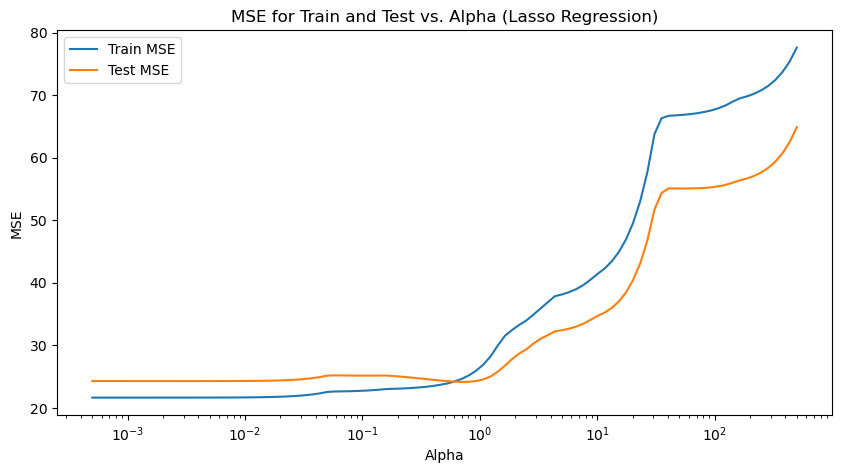

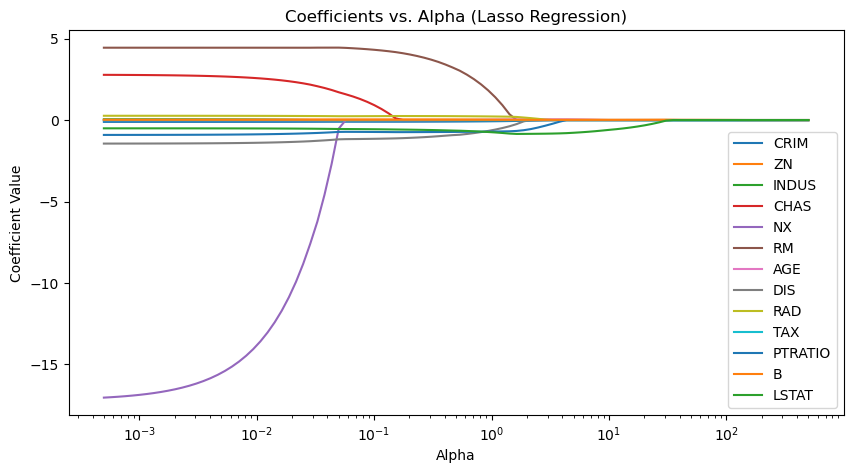

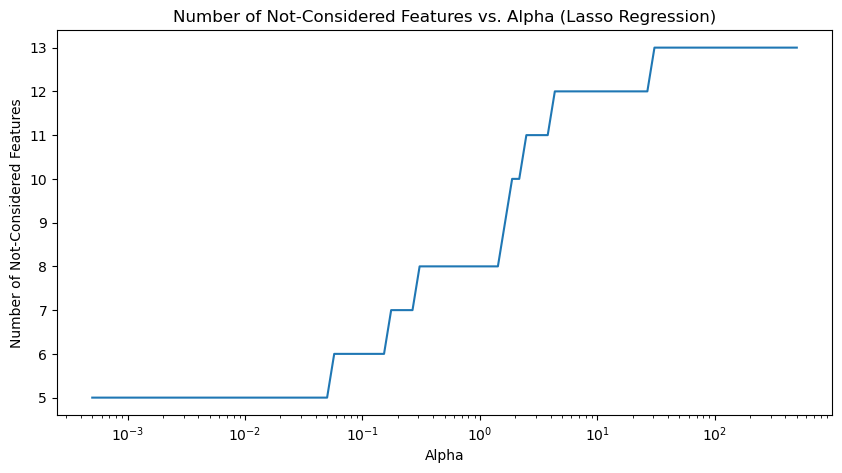

Optimal Alpha (Lasso): 0.7087370814634024
Optimal Model MSE (Lasso): 24.15321924307336
Optimal Model R^2 (Lasso): 0.6706399397086964

Optimal Model Coefficients (Lasso):
CRIM: -0.086
ZN: 0.031
INDUS: -0.0
CHAS: 0.0
NX: -0.0
RM: 2.508
AGE: 0.006
DIS: -0.802
RAD: 0.229
TAX: -0.013
PTRATIO: -0.721
B: 0.012
LSTAT: -0.69


In [20]:
## Write your code here ##

# Initialize lists to store results
mse_train_lasso = []
mse_test_lasso = []
coefficients_lasso = []
num_not_considered_features_lasso = []

# Train lasso regression models for each alpha
for alpha in alphas:
    # Initialize and train lasso regression model
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    
    # Predict on training and testing sets
    y_train_pred_lasso = lasso_model.predict(X_train)
    y_test_pred_lasso = lasso_model.predict(X_test)
    
    # Calculate MSE for training and testing sets
    mse_train_lasso.append(mean_squared_error(y_train, y_train_pred_lasso))
    mse_test_lasso.append(mean_squared_error(y_test, y_test_pred_lasso))
    
    # Store coefficients
    coefficients_lasso.append(lasso_model.coef_)
    
    # Calculate number of not-considered features (features with coefficients equal to zero)
    num_not_considered_features_lasso.append(np.sum(np.abs(lasso_model.coef_) < threshold))

# Plot MSE for train and test versus α
plt.figure(figsize=(10, 5))
plt.plot(alphas, mse_train_lasso, label='Train MSE')
plt.plot(alphas, mse_test_lasso, label='Test MSE')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('MSE for Train and Test vs. Alpha (Lasso Regression)')
plt.legend()
plt.xscale('log')
plt.show()

# Plot coefficients versus α
coefficients_lasso = np.array(coefficients_lasso)
plt.figure(figsize=(10, 5))
for i in range(len(X.columns)):
    plt.plot(alphas, coefficients_lasso[:, i], label=X.columns[i])
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.title('Coefficients vs. Alpha (Lasso Regression)')
plt.legend()
plt.xscale('log')
plt.show()

# Plot number of not-considered features versus α
plt.figure(figsize=(10, 5))
plt.plot(alphas, num_not_considered_features_lasso)
plt.xlabel('Alpha')
plt.ylabel('Number of Not-Considered Features')
plt.title('Number of Not-Considered Features vs. Alpha (Lasso Regression)')
plt.xscale('log')
plt.show()

# Select the optimal value of α based on minimum test MSE
optimal_alpha_lasso = alphas[np.argmin(mse_test_lasso)]

# Train lasso regression model with the optimal alpha
lasso_model_optimal = Lasso(alpha=optimal_alpha_lasso)
lasso_model_optimal.fit(X_train, y_train)

# Predict on testing set with the optimal model
y_test_pred_optimal_lasso = lasso_model_optimal.predict(X_test)

# Calculate MSE and R^2 with the optimal model
mse_optimal_lasso = mean_squared_error(y_test, y_test_pred_optimal_lasso)
r2_optimal_lasso = r2_score(y_test, y_test_pred_optimal_lasso)

# Print results for the optimal model
print("Optimal Alpha (Lasso):", optimal_alpha_lasso)
print("Optimal Model MSE (Lasso):", mse_optimal_lasso)
print("Optimal Model R^2 (Lasso):", r2_optimal_lasso)
print("\nOptimal Model Coefficients (Lasso):")
for feature, coef in zip(X.columns, lasso_model_optimal.coef_):
    print(feature + ":", round(coef, 3))


**Part 5:**
In this part, we intend to see the effect of ridge and lasso regression methods in overfitting prevention. In order to do this, change the ratio of training data to the whole data from low to high. As you know, the lower the ratio of trainig data, the more likely the overfitting would be. for each ratio, fit linear regression, ridge regression and lasso regression to data and then plot the following:

1- $R^2$ for test data versus ratio of training data (Three methods in one plot)

2- Selected α value versus training data ratio for ridge and lasso regression methods (In one plot)

How is the overall behavior of these plots and how do you analyze them?

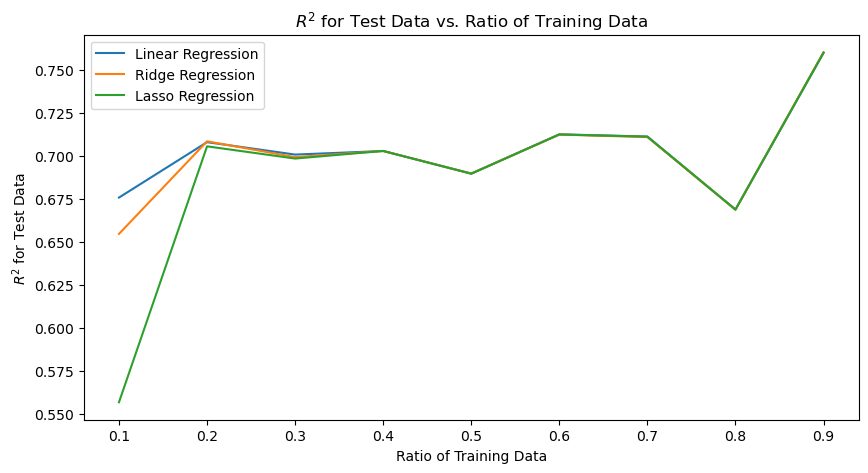

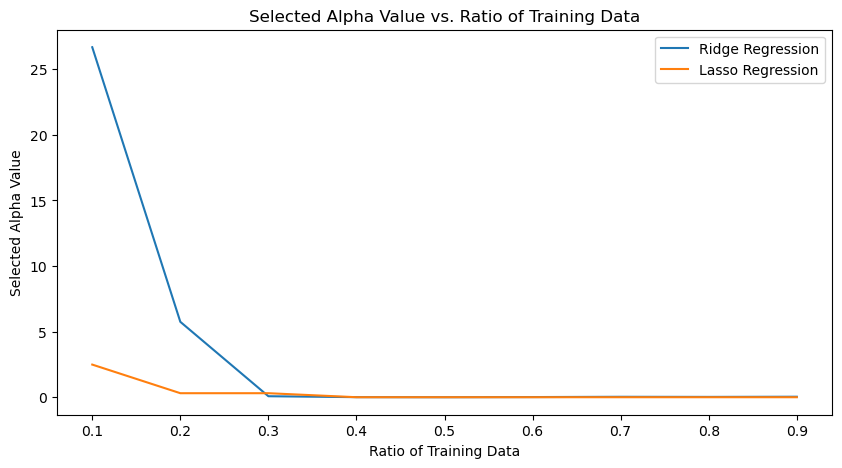

In [25]:
## Write you code here ##
# Define the range of training data ratios
training_data_ratios = np.linspace(0.1, 0.9, 9)

# Initialize lists to store results
r2_linear_regression = []
r2_ridge_regression = []
r2_lasso_regression = []
alpha_values_ridge = []
alpha_values_lasso = []

# Loop over different training data ratios
for ratio in training_data_ratios:
    # Split the data into training and testing sets with the current ratio
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-ratio, random_state=42)
    
    # Linear regression
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)
    r2_linear_regression.append(r2_score(y_test, linear_model.predict(X_test)))
    
    # Ridge regression
    ridge_model = RidgeCV(alphas=alphas)
    ridge_model.fit(X_train, y_train)
    r2_ridge_regression.append(r2_score(y_test, ridge_model.predict(X_test)))
    alpha_values_ridge.append(ridge_model.alpha_)
    
    # Lasso regression
    lasso_model = LassoCV(alphas=alphas)
    lasso_model.fit(X_train, y_train)
    r2_lasso_regression.append(r2_score(y_test, lasso_model.predict(X_test)))
    alpha_values_lasso.append(lasso_model.alpha_)

# Plot R^2 for test data versus ratio of training data
plt.figure(figsize=(10, 5))
plt.plot(training_data_ratios, r2_linear_regression, label='Linear Regression')
plt.plot(training_data_ratios, r2_ridge_regression, label='Ridge Regression')
plt.plot(training_data_ratios, r2_lasso_regression, label='Lasso Regression')
plt.xlabel('Ratio of Training Data')
plt.ylabel('$R^2$ for Test Data')
plt.title('$R^2$ for Test Data vs. Ratio of Training Data')
plt.legend()
plt.show()

# Plot selected α value versus training data ratio for ridge and lasso regression
plt.figure(figsize=(10, 5))
plt.plot(training_data_ratios, alpha_values_ridge, label='Ridge Regression')
plt.plot(training_data_ratios, alpha_values_lasso, label='Lasso Regression')
plt.xlabel('Ratio of Training Data')
plt.ylabel('Selected Alpha Value')
plt.title('Selected Alpha Value vs. Ratio of Training Data')
plt.legend()
plt.show()
